<a name="1"></a>
## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


<a name="1"></a>
## 2. Dataset

Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
the last 5 values of X: [2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
the last 5 values of y: [4.526 3.585 3.521 3.413 3.422]


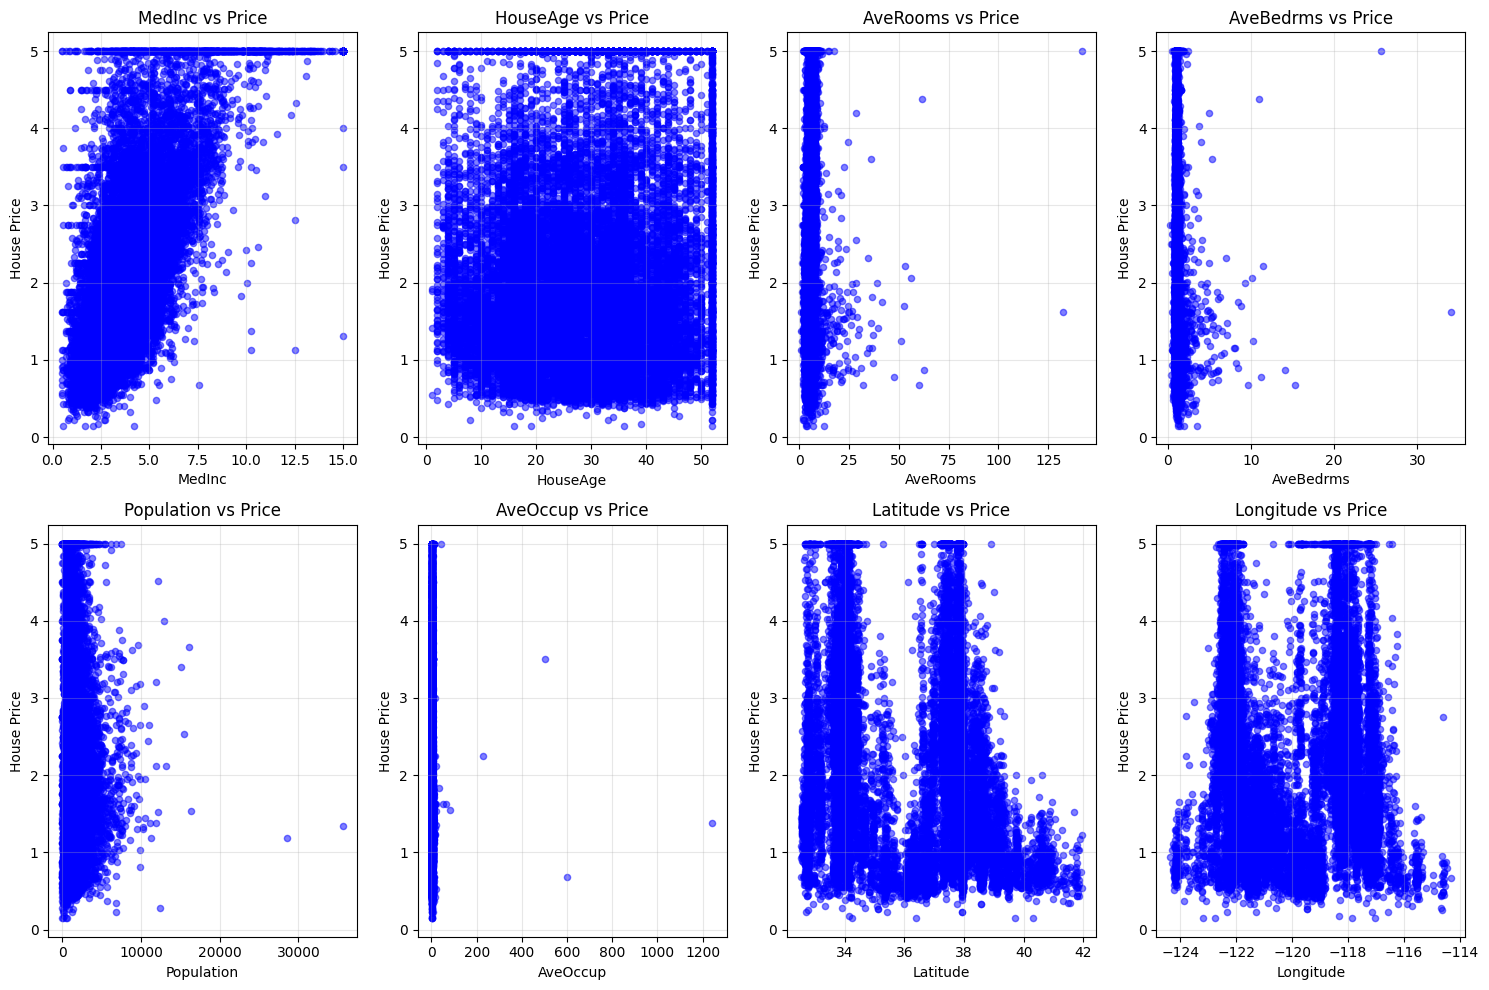

In [25]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names
print("Dataset shape:", X.shape)
print("Feature names:", feature_names)
print("the last 5 values of X:", X[:,5])
print("the last 5 values of y:", y[:5])

plt.figure(figsize=(15, 10))

for idx, feature_name in enumerate(feature_names):
    plt.subplot(2, 4, idx + 1)  # CHANGED: Use idx + 1 for different positions
    plt.scatter(X[:, idx], y, alpha=0.5, s=20, color='blue')
    plt.xlabel(feature_name)
    plt.ylabel('House Price')
    plt.title(f'{feature_name} vs Price')
    plt.grid(True, alpha=0.3)

plt.tight_layout()  # ADD THIS to prevent overlapping
plt.show()

<a name="1"></a>
## 3. Data preprocessing

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of validation samples: {X_val.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of training samples: 13209
Number of validation samples: 3303
Number of test samples: 4128


<a name="1"></a>
## 4. Linear Regression

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Scikit-learn Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Scikit-learn Model Performance:
Mean Squared Error: 0.5386
R² Score: 0.6097
